# Метод Фибоначчи

In [24]:
from matplotlib import  mlab
import pylab
import math as m
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fu = 0;

def f(x):
    global fu
    fu += 1;
    return (2.75 - m.sin(x)) / m.cos(x)

L, R, FL, FR, X1, X2, FX1, FX2, FU = [], [], [], [], [], [], [], [], []
N = [4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

def gss(l, r, eps):
    global fu
    phi = 144 / 89
    resphi = 2 - phi
    L.append(l)
    R.append(r)
    FL.append(f(l))
    FR.append(f(r))
    x1 = l + resphi * (r - l); X1.append(x1)
    x2 = r - resphi * (r - l); X2.append(x2)
    f1 = f(x1); FX1.append(f1)
    f2 = f(x2); FX2.append(f2)
    k = 0
    FU.append(fu); fu = 0;
    #print('k = ', k)
    if f1 < f2:
        r = x2; R.append(r); L.append(l)
        FR.append(f(r))
        FL.append(f(l))
        x2 = x1; X2.append(x2)
        f2 = f1; FX2.append(f2)
        x1 = l + resphi * (r - l); X1.append(x1)
        f1 = f(x1); FX1.append(f1)
    else:
        l = x1; L.append(l); R.append(r)
        FR.append(f(r))
        FL.append(f(l))
        x1 = x2; X1.append(x1)
        f1 = f2; FX1.append(f1)
        x2 = r - resphi * (r - l); X2.append(x2)
        f2 = f(x2); FX2.append(f2)
        
    FU.append(fu); fu = 0;
    #print(len(L), ' ',len(R), ' ',len(X1), ' ',len(X2), ' ',len(FX1), ' ',len(FX2), ' ',len(FL), ' ',len(FR), ' ',)
    while abs(r - l) > eps:
        k += 1
        #print('k = ', k)
        if f1 < f2:
            r = x2; R.append(r); L.append(l)
            FR.append(f(r))
            FL.append(f(l))
            x2 = x1; X2.append(x2)
            f2 = f1; FX2.append(f2)
            x1 = l + resphi * (r - l); X1.append(x1)
            f1 = f(x1); FX1.append(f1)
        else:
            l = x1; L.append(l); R.append(r)
            FL.append(f(l))
            FR.append(f(r))
            x1 = x2; X1.append(x1)
            f1 = f2; FX1.append(f1)
            x2 = r - resphi * (r - l); X2.append(x2)
            f2 = f(x2); FX2.append(f2)
        FU.append(fu); fu = 0;
        #print(len(L), ' ',len(R), ' ',len(X1), ' ',len(X2), ' ',len(FX1), ' ',len(FX2), ' ',len(FL), ' ',len(FR), ' ',)
    return (x1 + x2) / 2

x = gss(0, 1, 0.01)
#print('L ', L)
#print('R ', R)
#print('X1 ', X1) 
#print('X2 ', X2) 
#print('FL ', FL) 
#print('FR ', FR) 
#print('FX1 ', FX1) 
#print('FX2 ', FX2)

#print(FX2)
#print(np.transpose(np.transpose(FX2)))

items = [L, R, X1, X2, FL, FR, FX1, FX2, FU]
list(map(lambda x: np.transpose(x), items))

print("Ответ в радианах: ", "x =", x,            ',', "y =", f(x))
print("Ответ в градусах: ", "x =", m.degrees(x), ',', "y =", f(x))

raw_data =({'L':L, 'x1':X1, 'x2':X2, 'R':R, 'f(l)':FL, 'f(x1)':FX1, 'f(x2)':FX2, 'f(r)':FR, 'N': N})
df = pd.DataFrame(raw_data, columns = ['L', 'x1', 'x2', 'R', 'f(l)', 'f(x1)', 'f(x2)', 'f(r)', 'N'])
df[0:10]

Ответ в радианах:  x = 0.37288151547081566 , y = 2.5617384420375164
Ответ в градусах:  x = 21.36453709491985 , y = 2.5617384420375164


,L,x1,x2,R,f(l),f(x1),f(x2),f(r),N
0,0.000000,0.382022,0.617978,1.000000,2.750000,2.561882,2.663158,3.532335,4
1,0.000000,0.236081,0.382022,0.617978,2.750000,2.587888,2.561882,2.663158,1
2,0.236081,0.382022,0.472085,0.617978,2.587888,2.561882,2.577138,2.663158,1
3,0.236081,0.326240,0.382022,0.472085,2.587888,2.564799,2.561882,2.577138,1
4,0.326240,0.382022,0.416369,0.472085,2.564799,2.561882,2.564674,2.577138,1
5,0.326240,0.360671,0.382022,0.416369,2.564799,2.561932,2.561882,2.564674,1
6,0.360671,0.382022,0.395091,0.416369,2.561932,2.561882,2.562520,2.564674,1
7,0.360671,0.373820,0.382022,0.395091,2.561932,2.561742,2.561882,2.562520,1
8,0.360671,0.368828,0.373820,0.382022,2.561932,2.561754,2.561742,2.561882,1
9,0.368828,0.373820,0.376982,0.382022,2.561754,2.561742,2.561772,2.561882,1


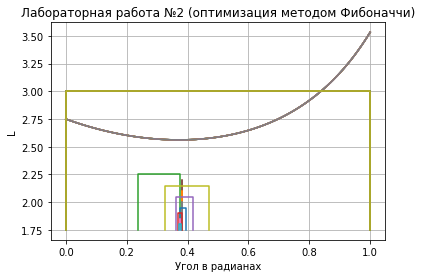

In [25]:
xlist = mlab.frange(0, 1, 0.01)
ylist = [f(x) for x in xlist]
a = np.array([0, 0, 1, 1])
b = np.array([1.75, 3, 3, 1.75])
j = 2.25
X_1=X1[1:]
X_2=X2[1:]
for i in range(len(X_1)):
    a1 = np.array([X_1[i], X_1[i], X_2[i-1], X_2[i-1]])
    b1 = np.array([1.75, j, j, 1.75])
    j -= 0.05
    pylab.plot(xlist,ylist, a, b, a1, b1)
pylab.xlabel("Угол в радианах")
pylab.ylabel("L")
pylab.title("Лабораторная работа №2 (оптимизация методом Фибоначчи)")
pylab.grid()
pylab.show()

# Метод Парабол

In [29]:
A, B, C, X, FA, FB, FC, FX, FU = [],[],[],[],[],[],[],[],[];
def parabola(a, b, c, eps):
    global fu    
    iter = 0
    
    while c-a > eps:
        iter += 1;
        fa = f(a); fb = f(b); fc = f(c);
        b1=0.5*( (a+c)*(a-c)*(fb-fc) - (b+c)*(b-c)*(fa-fc) ) / ( (a-c)*(fb-fc) - (b-c)*(fa-fc) );
        a1=0.5*( (a+c)*(c-a)*(fa-fb) - (a+b)*(a-b)*(fc-fa) ) / ( (c-a)*(fa-fb) - (a-b)*(fc-fa) );
        c1=0.5*( (b+c)*(b-c)*(fa-fc) - (a+c)*(a-c)*(fb-fc) ) / ( (b-c)*(fa-fc) - (a-c)*(fb-fc) );
        if (( (b1<=a1)&(a1<=c1) ) | ( (a1<=c1)&(a1<=b1) )): b1=a1;
        if (( (b1<=c1)&(c1<=a1) ) | ( (a1<=c1)&(c1<=b1) )): b1=c1;

        if (b1>b):
            temp=b1; 
            b1=b; 
            b=temp;

        if (f(b1)<fb):
            c=b;
            b=b1;
        else:
            a=b1;
        A.append(a);B.append(b);C.append(c);
        FA.append(f(a));FB.append(f(b));FC.append(f(c));
        if ( (b-a)/(c-a)<=eps ): b=2*b-a; 
        if ( (c-b)/(b-a)<=eps ): b=2*b-c;
        X.append(b);
        FX.append(f(b));
        FU.append(fu-7); fu = 0;
    return b    
x = parabola(0.1, 0.3, 0.4, 0.01)

print("Ответ в радианах: ","x =",x,',',"y =",f(x))
print("Ответ в градусах: ","x =", m.degrees(x),',',"y =",f(x))
raw_data =({'A':A, 'B':B, 'C':C, 'X':X, 'f(A)':FA, 'f(B)':FB, 'f(C)':FC, 'f(X)':FX, 'N':FU})
df = pd.DataFrame(raw_data, columns = ['A', 'B', 'C', 'X', 'f(A)', 'f(B)', 'f(C)', 'f(X)', 'N'])
df

Ответ в радианах:  x = 0.3721586378516429 , y = 2.561737691634453
Ответ в градусах:  x = 21.323119258236783 , y = 2.561737691634453


,A,B,C,X,f(A),f(B),f(C),f(X),N
0,0.300000,0.373306,0.400000,0.373306,2.569231,2.561740,2.562894,2.561740,3
1,0.300000,0.371786,0.373306,0.371786,2.569231,2.561738,2.561740,2.561738,1
2,0.371786,0.372159,0.373306,0.372159,2.561738,2.561738,2.561740,2.561738,1


# График метода парабол

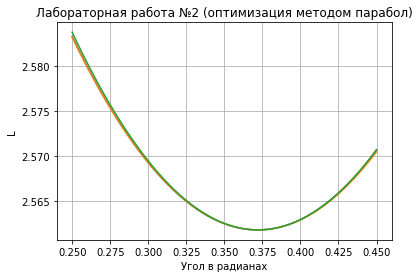

In [18]:
def futemp(a,b,c,x):
    fa=f(a); fb=f(b); fc=f(c);
    ka=(fc - (c*(fb-fa)+b*fa-a*fb)/(b - a))/(c*(c-a-b)+a*b);
    kb=(fb-fa)/(b-a)-ka*(a+b);
    kc=(b*fa-a*fb)/(b-a)+ka*a*b;
    return ka*x*x+kb*x+kc;
xlist = mlab.frange(0.1, 0.3, 0.001)
ylist = [f(x) for x in xlist]
X_1=A
X_2=B
X_3=C
for i in range(len(X_1)):
    xlist = mlab.frange(0.25, 0.45, 0.001)
    ylist = [futemp(X_1[i],X_2[i],X_3[i],x) for x in xlist]
    pylab.plot(xlist,ylist)
pylab.xlabel("Угол в радианах")
pylab.ylabel("L")
pylab.title("Лабораторная работа №2 (оптимизация методом парабол)")
pylab.grid()
pylab.show()

[0.1, 0.20032046807061193, 0.20035918207257253, 0.20035918207257253]

Минимальный угол для золотого сечения:  в градусах = 21.3236857861277 ; в радианах = 0.3721685256286438
Минимальный угол для парабол: в градусах = 21.323685582917854 ; в радианах = 0.372168522082


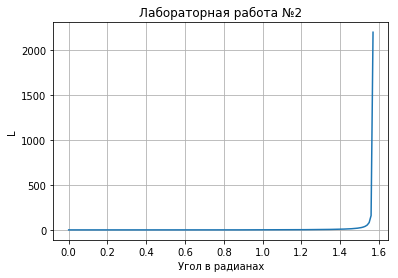

In [17]:
import math as m
from scipy.optimize import *
from matplotlib import  mlab
import pylab

# вводим интервал
xmindegree = m.radians(0)
xmaxdegree = m.radians(90)
dx=0.01

# применяем стандартные функции scipy.optimize
method_gold = golden(f, brack=[m.radians(xmindegree), m.radians(xmaxdegree)])
method_parb = brent(f, brack=[m.radians(xmindegree), m.radians(xmaxdegree)])

# ответ
print('Минимальный угол для золотого сечения:  в градусах =', m.degrees(method_gold),'; в радианах =', method_gold )
print('Минимальный угол для парабол: в градусах =', m.degrees(method_parb),'; в радианах =', method_parb)

#  рисунок целевой функции
xlist = mlab.frange(xmindegree,xmaxdegree,dx)
ylist = [f (x) for x in xlist]
pylab.plot(xlist,ylist)
pylab.xlabel("Угол в радианах")
pylab.ylabel("L")
pylab.title("Лабораторная работа №2")
pylab.grid()
pylab.show()